In [1]:
# %pip install numpy
# %pip install opencv-python
# %pip install matplotlib
# %pip install -U scikit-image

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import statistics

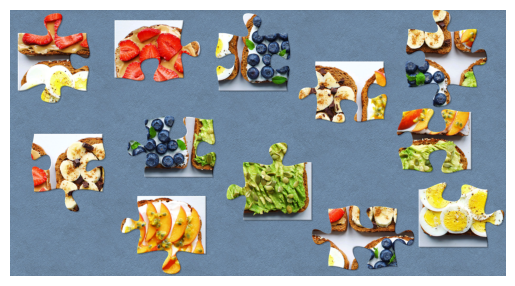

In [3]:

path = 'puzzles/sandwiches.png'

img_orig = cv2.imread(path,1)
img_color = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

plt.axis("off")
plt.imshow(img_color)
plt.show()

In [4]:
def show(img_input):
    plt.figure(figsize=(13,10))
    plt.axis("off")
    plt.imshow(img_input)
    plt.show()
    return

In [5]:
def show_gray(img_input):
    plt.figure(figsize=(13,10))
    plt.axis("off")
    plt.imshow(img_input, cmap=plt.get_cmap('gray'))
    plt.show()
    return

In [23]:
def remove_background(img_input, thresh):
    x,y,z = img_input.shape
    img_2d = np.zeros((x,y), dtype = np.uint8)
    max = [0,0,0]
    std = [0,0,0]
    color_img_array = np.array(img_input)
    color = [color_img_array[:,:,0].flatten(), color_img_array[:,:,1].flatten(), color_img_array[:,:,2].flatten()]
    c = ('r','g','b')
    for i, col in enumerate(color):
        histr, _ = np.histogram(col, bins=256, range=[0, 256])
        max[i] = histr.argmax()
        std[i] = np.std(col.flatten(), axis = 0)
    #     plt.plot(histr, color=c[i])
    #     plt.xlim([0,256])
    # plt.title('Histogram for color scale picture')
    # plt.show()
    
    img_input = img_input.astype(int)
    stddev = [int(x*thresh) for x in std]
    for i in range(img_input.shape[0]):
        for j in range(img_input.shape[1]):
            changed = False
            if max[0] - stddev[0] < img_input[i][j][0] and img_input[i][j][0] <  max[0]+stddev[0]:
                if max[1] - stddev[1] < img_input[i][j][1] and img_input[i][j][1] <  max[1]+stddev[1]:
                    if max[2] - stddev[2] < img_input[i][j][2] and img_input[i][j][2] <  max[2]+stddev[2]:
                        img_2d[i][j] = 0
                        changed = True
            if not changed:
                img_2d[i][j] = 255

    return img_2d
        
    

In [7]:
def remove_gray_background(img_input, thresh):
    max = 0
    std = 0
    color = np.array(img_input)
    histr, _ = np.histogram(color, bins=256, range=[0, 256])
    max = histr.argmax()
    std = np.std(color.flatten(), axis = 0)
    # plt.plot(histr, color=c[i])
    # plt.xlim([0,256])
    # plt.title('Histogram for color scale picture')
    # plt.show()
    
    img_input = img_input.astype(int)
    stddev = std*thresh
    for i in range(img_input.shape[0]):
        for j in range(img_input.shape[1]):
            changed = False
            if max - stddev < img_input[i][j] and img_input[i][j] <  max+stddev:
                img_input[i][j] = 0
                changed = True
                        
            if not changed:
                img_input[i][j] = 255
    return img_input
        
    

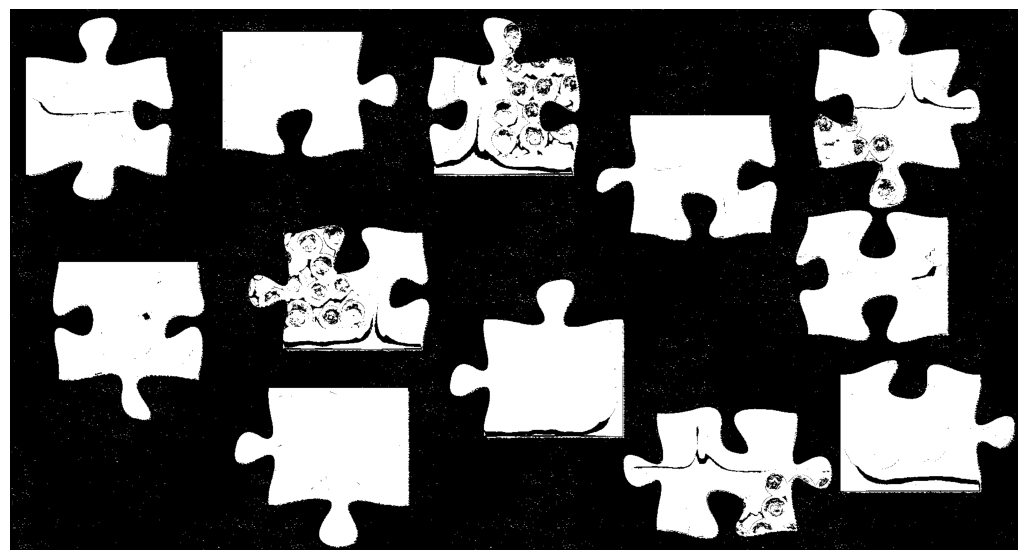

In [25]:
img_test = np.copy(img_color)
img_test = remove_background(img_test, 0.75)

show_gray(img_test)

In [27]:
img_test = img_test.astype(np.uint8)


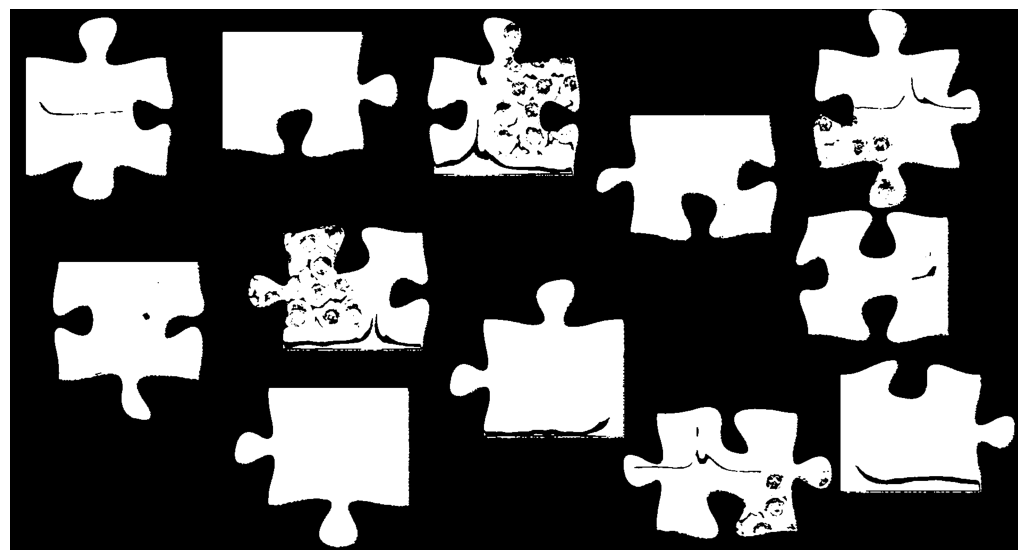

In [72]:
img_median = cv2.medianBlur(img_test, 3)
show_gray(img_median)

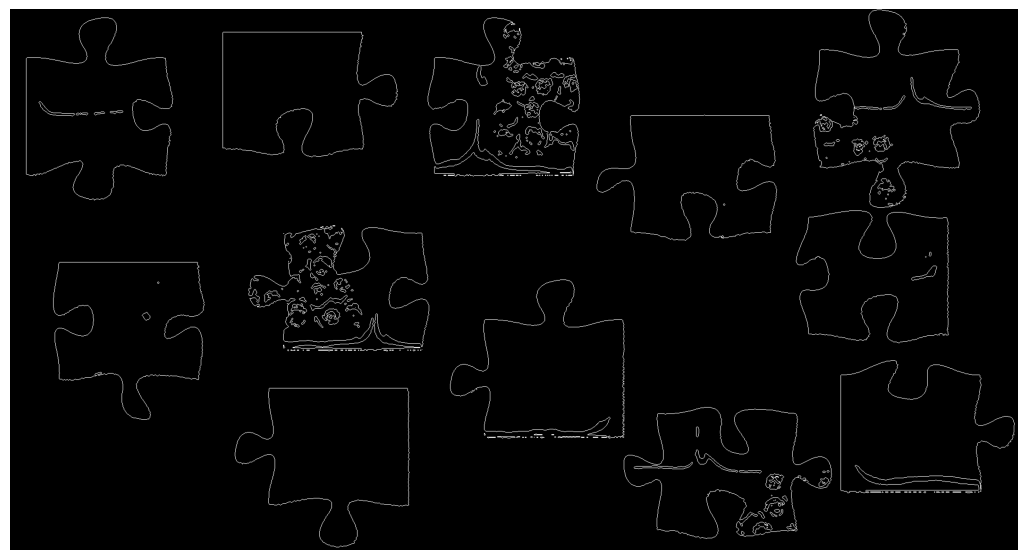

In [73]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
dilate_img_copy = cv2.dilate(img_median, kernel)
erode_img_copy = cv2.erode(img_median, kernel)
background_img = img_median - erode_img_copy
show_gray(background_img)

In [ ]:
# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(img_color, (3, 3), 0)

# Apply Canny edge detector
edges = cv2.Canny(blurred, 80, 200)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
edges = cv2.dilate(edges, kernel)
# # Display the original image and the detected edges
plt.figure(figsize = (15, 12))
# plt.subplot(121), plt.imshow(img_color, cmap='gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# set the kernel size, depending on whether we are using the Sobel
# operator of the Scharr operator, then compute the gradients along
# the x and y axis, respectively
ksize = 3 # -1
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)
# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)
# combine the gradient representations into a single image
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
# show our output images

show_gray(gX)
show_gray(gY)
show_gray(combined)


In [ ]:

# compute gradients along the x and y axis, respectively
gX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
# compute the gradient magnitude and orientation
magnitude = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

show_gray(gray)
show_gray(magnitude)
show_gray(orientation)


In [ ]:
laplacian = cv2.Laplacian(gray, cv2.CV_8U)
sobelx = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(gray,cv2.CV_8U,0,1,ksize=5)

show_gray(laplacian)
show_gray(sobelx)
show_gray(sobely)

In [ ]:
img_blur = cv2.GaussianBlur(gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_8U, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_8U, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_8U, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

show_gray(sobelxy)
show_gray(sobelx)
show_gray(sobely)

In [ ]:
edges = cv2.Canny(image=img_blur, threshold1=75, threshold2=200)

show_gray(edges)

In [60]:
def connect_nearby(img, val):
    img_new = np.copy(img)
    img = np.pad(img, val+1,'constant', constant_values=(0, 0))
    diff_grid=[[0,1],[1,0],[0,-1],[-1,0]]
    diff_check= [[-1,0], [0,1],[1,0],[0,-1]]
    img_x, img_y = img.shape
    # print(img.shape)
    for x in range(img_x - val - val-2):
        x_val = x+val+1
        for y in range(img_y - val - val-2):
            y_val = y+val+1
            if(img[x_val][y_val]==255):
                for loop in range(val):
                    curr_x = x_val - (loop+1)
                    curr_y = y_val - (loop+1)
                    iterate = 8*(loop+1)
                    for i in range(iterate):
                        color =0
                        next = (int)(i/(iterate/4))
                        # print(str(curr_x)+ ", "+ str(curr_y))
                        if(i%(iterate/4)==0):
                            if(i ==0):
                                if(img[curr_x][curr_y-1]==255 | img[curr_x-1][curr_y-1]==255 | img[curr_x-1][curr_y]==255):
                                    color =255
                            elif(i== iterate/4):
                                if(img[curr_x-1][curr_y]==255 | img[curr_x-1][curr_y+1]==255 | img[curr_x][curr_y+1]==255):
                                    color =255
                            elif(i== iterate/2):
                                if(img[curr_x][curr_y+1]==255 | img[curr_x+1][curr_y+1]==255 | img[curr_x+1][curr_y]==255):
                                    color =255
                            else:
                                if(img[curr_x+1][curr_y]==255 | img[curr_x+1][curr_y-1]==255 | img[curr_x][curr_y-1]==255):
                                    color =255
                        else:
                            comp_x = curr_x+diff_check[next][0]
                            comp_y = curr_y+diff_check[next][1]
                            if(img[comp_x][comp_y]==255):
                                color=255
                        if(color==255):
                            cv2.line(img_new,(y_val-val-1,x_val-val-1), (curr_y-val-1,curr_x-val-1), 255,1 )
                            # img_new[curr_x-val-1][curr_y-val-1] = 255


                        curr_x = curr_x + diff_grid[next][0]
                        curr_y = curr_y + diff_grid[next][1]
                    
                # print(str(x_val)+ ", "+ str(y_val))
                # print(img[x_val][y_val])
    return img_new



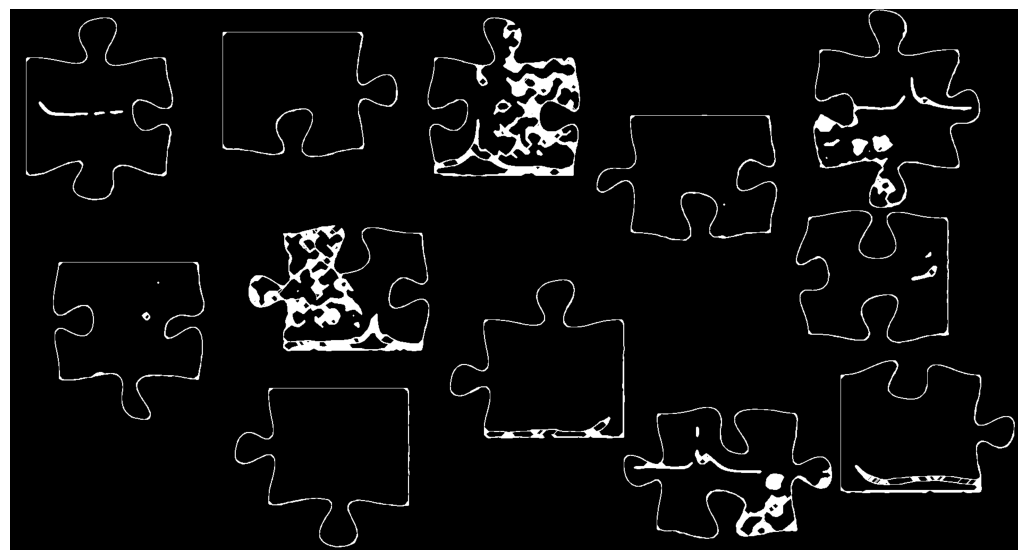

In [74]:
img_connect = np.copy(background_img)
img_connect = connect_nearby(img_connect,7)


show_gray(img_connect)

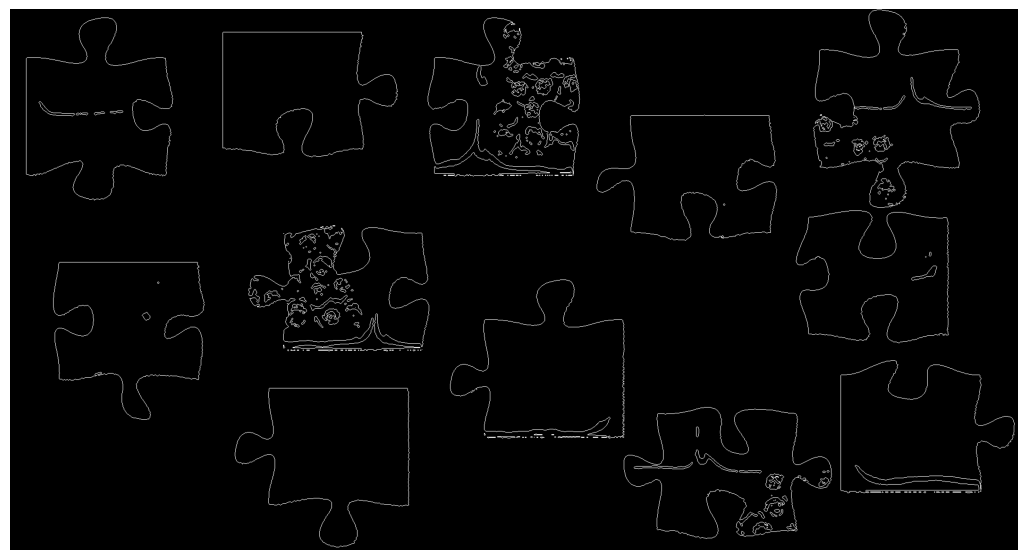

In [75]:
show_gray(background_img)